In [1]:
import os,json
import pylab as plt
from sbmtm import sbmtm
import graph_tool.all as gt
from collections import defaultdict

done = []


In [147]:
done.extend(["18815488-2-a-m-at-the-cat-s-pajamas"])


In [148]:
done

['13167199-shine-shine-shine',
 '11890805-a-good-american',
 '12408149-a-land-more-kind-than-home',
 '18815488-2-a-m-at-the-cat-s-pajamas']

In [151]:

for directory, sub, files in os.walk("./cleaned_posts"):
    splits = directory.split("/")
    book = splits[-1]
    super_dir = "/".join(splits[:-2])
    
    if book not in done and directory != "./cleaned_posts":
    
        docs = []
        titles = []
        for file in files:
            if ".json" in file:
                with open(directory+"/"+file, "r") as f:
                    book_dictionary = json.loads(f.read())
                    docs.append(book_dictionary["doc"])
                    titles.append(file.replace(".json",""))

        model = sbmtm()
        print("creating model for {}".format(directory.split("/")[-1]))
        model.make_graph(docs,documents=titles)
        model.fit()


        splits = directory.split("/")
        book = splits[-1]
        super_dir = "/".join(splits[:-2])

        model.save_graph(filename=super_dir+"/book_graphs/"+book+"_network.gt.gz")
        pos,t,tpos = model.state.draw(layout="bipartite", output_size=(1000, 1000),output=super_dir+"/cleaned_networks/"+book+"_network.png",hshortcuts=1, hide=0)

        arr = pos.get_2d_array(range(5))

        deltas = []
        for doc_name in model.documents:
            delta = doc_name.split("_")[0]
            deltas.append(int(delta))

        deltas.sort()

        inc = 1/len(model.documents)

        locs = defaultdict(list)
        val = .5
        for d in deltas:
            locs[d].append(val)
            val -= inc

        docs_to_loc = []
        for doc_name in model.documents:
            delta = int(doc_name.split("_")[0])

            y_val = locs[delta].pop(0)
            docs_to_loc.append(y_val)


        for i in range(len(model.documents)):
            arr[1][i] = docs_to_loc[i]
        pos.set_2d_array(arr)

        model.state.draw(layout=pos, output_size=(1000, 1000),output=super_dir+"/clean_networks_time/"+book+"_network_time.png",hshortcuts=1, hide=0)

        done.append(book)
    
    
    
    

creating model for 18652002-the-bees
creating model for 13540215-the-orchardist
creating model for 16158564-you-are-one-of-them
creating model for 18428067-a-constellation-of-vital-phenomena
creating model for 9902278-the-borrower
creating model for 13330761-the-dog-stars
creating model for 11250317-the-song-of-achilles
creating model for 17586469-lies-you-wanted-to-hear
creating model for 12401556-the-age-of-miracles
creating model for 10846336-salvage-the-bones
creating model for 8366402-the-tiger-s-wife
creating model for 15790893-amity-sorrow
creating model for 18651980-fourth-of-july-creek
creating model for 13593526-city-of-women
creating model for 15781725-the-house-girl
creating model for 16045140-the-love-affairs-of-nathaniel-p
creating model for 18498569-the-miniaturist
creating model for 10996342-the-art-of-fielding
creating model for 18114280-the-unchangeable-spots-of-leopards
creating model for 15811505-ghana-must-go
creating model for 17333319-burial-rites
creating model 

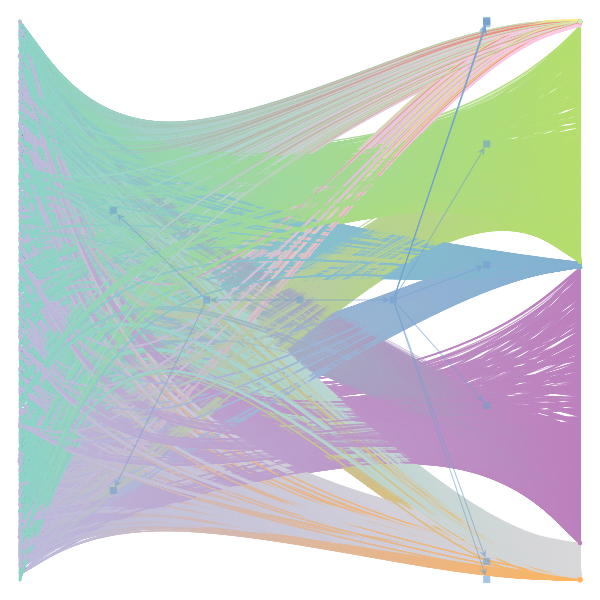

In [139]:
pos,t,tpos = model.state.draw(layout="bipartite", output_size=(1000, 1000),output=directory+"_network.png",hshortcuts=1, hide=0)

arr = pos.get_2d_array(range(5))


deltas = []
for doc_name in model.documents:
    delta = doc_name.split("_")[0]
    deltas.append(int(delta))

deltas.sort()

inc = 1/len(model.documents)

locs = defaultdict(list)
val = .5
for d in deltas:
    locs[d].append(val)
    val -= inc

docs_to_loc = []
for doc_name in model.documents:
    delta = int(doc_name.split("_")[0])
    
    y_val = locs[delta].pop(0)
    docs_to_loc.append(y_val)


for i in range(len(model.documents)):
    arr[1][i] = docs_to_loc[i]
pos.set_2d_array(arr)

pos,t,tpos = model.state.draw(layout=pos, output_size=(1000, 1000),output=directory+"_network_time.png",hshortcuts=1, hide=0)



In [136]:
arr = pos.get_2d_array(range(5))


deltas = []
for doc_name in model.documents:
    delta = doc_name.split("_")[0]
    deltas.append(int(delta))

deltas.sort()

inc = 1/len(model.documents)

locs = defaultdict(list)
val = .5
for d in deltas:
    locs[d].append(val)
    val -= inc

print(locs)
    
docs_to_loc = []
for doc_name in model.documents:
    delta = int(doc_name.split("_")[0])
    
    y_val = locs[delta].pop(0)
    docs_to_loc.append(y_val)


for i in range(len(model.documents)):
    arr[1][i] = docs_to_loc[i]
pos.set_2d_array(arr)


In [14]:
for directory, sub, files in os.walk("./posts"):
    dir_split = directory.split("/")
    book_name = dir_split[-1]
    print(directory)
    if not os.path.exists("./cleaned_posts/"+book_name+"_network.png") and directory!="./posts":
        docs = []
        titles = []
        for file in files:
            if ".json" in file:
                with open(directory+"/"+file, "r") as f:
                    book_dictionary = json.loads(f.read())
                    docs.append(book_dictionary["doc"])

        model = sbmtm()
        print("creating model for {}".format(directory.split("/")[-1]))
        model.make_graph(docs)
        model.fit()
        #model.save_graph(filename=directory+"network.gt.gz")
        #model.plot(filename=directory+"_network.png", nedges=10000)
        model.plot(nedges=10000)

./posts
./posts/13167199-shine-shine-shine
creating model for 13167199-shine-shine-shine


KeyboardInterrupt: 